In [ ]:
import numpy as np
import pandas as pd
import statistics
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

**Importing and merging the data**

In [ ]:
data1 = pd.read_csv('dataICUForStudents/Edited/outputWeaningData1_c1.csv')
data2 = pd.read_csv('dataICUForStudents/Edited/outputWeaningData2_c1.csv')
data3 = pd.read_csv('dataICUForStudents/Edited/outputWeaningData3_c1.csv')
data4 = pd.read_csv('dataICUForStudents/Edited/outputWeaningData4_c1.csv')
data5 = pd.read_csv('dataICUForStudents/Edited/outputWeaningData5_c1.csv')

In [ ]:
data2 = data2.drop(' ID.1',1)

In [ ]:
new_col_heads = ['Time','ID','AdmissionDate','DischargeDate','CCOutcome','HospOutcome','VentMode',
                'PS_Above_PEEP','EPAP_PEEP','SET_FIO2','Spont_RR','Deadspace','SBI',
                'P01','PH','PaCO2','PaO2','LactateABG','HeartRate','ArtSystollic','ArtMAP','Temperature']

In [ ]:
data1.columns = new_col_heads
data2.columns = new_col_heads
data3.columns = new_col_heads
data4.columns = new_col_heads
data5.columns = new_col_heads

In [ ]:
all_data = pd.concat([data1,data2,data3,data4,data5])

In [ ]:
num_vars = ['PS_Above_PEEP','EPAP_PEEP','SET_FIO2','Spont_RR','Deadspace','SBI','P01','PH',
            'PaCO2','PaO2','LactateABG','HeartRate','ArtSystollic','ArtMAP','Temperature']
cat_vars = ['CCOutcome','HospOutcome','VentMode']

To make manipulation of the data easier, the numerical variables will be transformed into a float data type

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3200672 entries, 0 to 482521
Data columns (total 22 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Time           object
 1   ID             int64 
 2   AdmissionDate  object
 3   DischargeDate  object
 4   CCOutcome      object
 5   HospOutcome    object
 6   VentMode       object
 7   PS_Above_PEEP  object
 8   EPAP_PEEP      object
 9   SET_FIO2       object
 10  Spont_RR       object
 11  Deadspace      object
 12  SBI            object
 13  P01            object
 14  PH             object
 15  PaCO2          object
 16  PaO2           object
 17  LactateABG     object
 18  HeartRate      object
 19  ArtSystollic   object
 20  ArtMAP         object
 21  Temperature    object
dtypes: int64(1), object(21)
memory usage: 561.6+ MB


In [ ]:
for col in num_vars:
    all_data[col] = all_data[col].astype('float64')

**Dataset Description**

In [ ]:
all_data.head()

,Time,ID,AdmissionDate,DischargeDate,CCOutcome,HospOutcome,VentMode,PS_Above_PEEP,EPAP_PEEP,SET_FIO2,...,SBI,P01,PH,PaCO2,PaO2,LactateABG,HeartRate,ArtSystollic,ArtMAP,Temperature
0,02/05/2140 00:07,44162,01/05/2140 21:34,13/05/2140 10:53,A,NaN,PC,NaN,12.0,100.0,...,NaN,0.2,NaN,NaN,NaN,NaN,101.0,168.0,116.0,NaN
1,02/05/2140 00:08,44162,01/05/2140 21:34,13/05/2140 10:53,A,NaN,PC,NaN,15.0,100.0,...,NaN,0.9,NaN,NaN,NaN,NaN,103.0,NaN,180.0,NaN
2,02/05/2140 00:19,44162,01/05/2140 21:34,13/05/2140 10:53,A,NaN,PC,NaN,15.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,124.0,130.0,78.0,NaN
3,02/05/2140 00:20,44162,01/05/2140 21:34,13/05/2140 10:53,A,NaN,PRVC,NaN,15.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,123.0,131.0,76.0,NaN
4,02/05/2140 00:21,44162,01/05/2140 21:34,13/05/2140 10:53,A,NaN,PRVC,NaN,15.0,99.0,...,NaN,1.0,NaN,NaN,NaN,NaN,123.0,120.0,69.0,NaN


To allow interpolation and easier manipulation of the missing data, the current form the missing value is represented by, ' Null', will be replaced by an np.NaN value.

In [ ]:
all_data = all_data.replace(' NULL', np.NaN)
all_data = all_data.replace('nan', np.NaN)

Initially investigate the missing data accross all the patients to see what features can have missing values imputed.

In [ ]:
cols = all_data.columns

In [ ]:
for col in cols:
    pct = (all_data[col].isna().sum())/len(all_data)*100
    print(col,' : %.3f'%pct,'%')

Time  : 17.696 %
ID  : 0.000 %
AdmissionDate  : 17.696 %
DischargeDate  : 17.704 %
CCOutcome  : 17.696 %
HospOutcome  : 42.198 %
VentMode  : 17.696 %
PS_Above_PEEP  : 52.944 %
EPAP_PEEP  : 17.708 %
SET_FIO2  : 17.759 %
Spont_RR  : 17.866 %
Deadspace  : 17.819 %
SBI  : 47.660 %
P01  : 40.393 %
PH  : 99.527 %
PaCO2  : 99.526 %
PaO2  : 99.529 %
LactateABG  : 99.527 %
HeartRate  : 18.894 %
ArtSystollic  : 24.546 %
ArtMAP  : 24.105 %
Temperature  : 96.152 %


For columns Time, AdmissionDate, DischargeDate, CCOutcome, VentMode, EPAP_PEEP, SET_FIO2, Spont_RR, Deadspace, ArtSystollic, ArtMAP with ~ 17-25% missing values, this could be due to patient IDs with complete missing data in all columns. Furthermore, data with no time input will not be used in this investigation.

In order to examine individual patients, I will create dictionary with the keys being the patient ID, and the values being that patients associated dataset of features.

In [ ]:
patients = list(set(all_data['ID']))

In [ ]:
patient_dict = {}
for patient in patients:
    df = all_data.loc[all_data['ID'] == patient]
    df.drop_duplicates
    patient_dict.update( { patient : df } )

For each patient, I will find the percentage of missing values for each

In [ ]:
patient_missing = {}
for patient in patient_dict:
    miss = {}
    df = patient_dict[patient]
    for col in df:
        num_NAN = df[col].isnull().sum()
        pct = ((num_NAN)/len(df))*100
        miss.update({col:pct})
    patient_missing.update({patient:miss})

In [ ]:
non_sparse_data_num = ['Time','AdmissionDate','DischargeDate','CCOutcome','VentMode','EPAP_PEEP',
                       'SET_FIO2','Spont_RR','Deadspace','ArtSystollic','ArtMAP']

In [ ]:
table = {'Time':{'b0_20':0,'b20_50':0,'b50_80':0,'b80_100':0},
         'AdmissionDate':{'b0_20':0,'b20_50':0,'b50_80':0,'b80_100':0},
         'DischargeDate':{'b0_20':0,'b20_50':0,'b50_80':0,'b80_100':0},
         'CCOutcome':{'b0_20':0,'b20_50':0,'b50_80':0,'b80_100':0},
         'VentMode':{'b0_20':0,'b20_50':0,'b50_80':0,'b80_100':0},
         'EPAP_PEEP':{'b0_20':0,'b20_50':0,'b50_80':0,'b80_100':0},
         'SET_FIO2':{'b0_20':0,'b20_50':0,'b50_80':0,'b80_100':0},
         'Spont_RR':{'b0_20':0,'b20_50':0,'b50_80':0,'b80_100':0},
         'Deadspace':{'b0_20':0,'b20_50':0,'b50_80':0,'b80_100':0},
         'ArtSystollic':{'b0_20':0,'b20_50':0,'b50_80':0,'b80_100':0},
         'ArtMAP':{'b0_20':0,'b20_50':0,'b50_80':0,'b80_100':0} }

In [ ]:
for patient in patients:
    patient_misses = patient_missing[patient]
    for col in non_sparse_data_num:
        if patient_misses[col] <= 20:
            table[col]['b0_20'] = table[col]['b0_20'] + 1
        elif 20 < patient_misses[col] <= 50:
            table[col]['b20_50'] = table[col]['b20_50'] + 1
        elif 50 < patient_misses[col] <= 80:
            table[col]['b50_80'] = table[col]['b50_80'] + 1    
        else:
            table[col]['b80_100'] = table[col]['b80_100'] + 1   

Below is the count of missing data for each variable for each patient

| Feature | <20% | 20 to 50% | 50 to 80% | >80% |
| --- | --- | --- | --- | --- |
| Time | 408 | 0 | 1 |93|
|AdmissionDate|408|0|1|93|
|DischargeDate|407|0|1|93|
|CCOutcome|408|0|1|94|
|VentMode|408|0|1|93|
|EPAP_PEEP|408|0|1|93|
|SET_FIO2|407|1|1|93|
|Spont_RR|407|1|1|93|
|Deadspace|408|0|1|93|
|ArtSystollic|395|8|5|94|
|ArtMAP|395|8|5|94|

Now to visualise the average percent of missing data for each patient out of the features below, to test whether there are patients with all null values that can be excluded from the data set

In [ ]:
patient_av = {}
for patient in patients:
    pat_dict = patient_missing[patient]
    patient_av.update( {patient : statistics.mean([pat_dict.get(key) for key in non_sparse_data_num]) } )

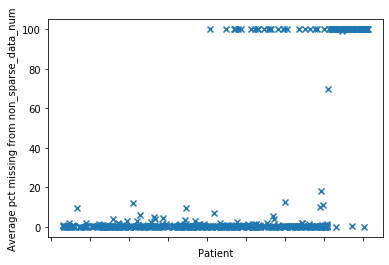

In [ ]:
plt.scatter(list(patient_av.keys()),list(patient_av.values()),marker='x')
fig = plt.gca()
plt.xlabel('Patient')
plt.ylabel('Average pct missing from non_sparse_data_num')
fig.axes.xaxis.set_ticklabels([])
plt.show()

As can clearly be seen from the above figure, there are patients with large amounts of missing data. These will now be removed from the dataset.

In [ ]:
few_data = []
for patient in patients:
    if patient_missing[patient]['ArtSystollic'] > 20:
        few_data.append(patient)

In [ ]:
len(few_data)

107

In [ ]:
for patient in few_data:
    del(patient_dict[patient])
    all_data = all_data[all_data['ID'] != patient]

### Value Imputation

Now we working on new dataset with patients with subsantial of their data missing removed. 

In [ ]:
for col in cols:
    pct = (all_data[col].isna().sum())/len(all_data)*100
    print(col,' : %.3f'%pct,'%')

Time  : 0.000 %
ID  : 0.000 %
AdmissionDate  : 0.000 %
DischargeDate  : 0.012 %
CCOutcome  : 0.000 %
HospOutcome  : 31.221 %
VentMode  : 0.000 %
PS_Above_PEEP  : 46.730 %
EPAP_PEEP  : 0.014 %
SET_FIO2  : 0.026 %
Spont_RR  : 0.144 %
Deadspace  : 0.135 %
SBI  : 40.417 %
P01  : 30.643 %
PH  : 99.379 %
PaCO2  : 99.377 %
PaO2  : 99.382 %
LactateABG  : 99.378 %
HeartRate  : 0.617 %
ArtSystollic  : 2.607 %
ArtMAP  : 2.028 %
Temperature  : 97.255 %


**Interpolating missing data**

For numerical features with less than XXX perecent of the values missing, the missing values will be filled in using linear interpolation.

In [ ]:
patients = list(set(all_data['ID']))

In [ ]:
updt_p_d = {}

for patient in patients:
    df = patient_dict[patient]
    for col in num_vars:
        perc_miss = ( df[col].isna().sum() ) / len(df)
        if perc_miss < 0.3:
            df_sm = df[col]
            df_sm = df_sm.interpolate(method='linear').ffill().bfill()
            df[col] = df_sm
    updt_p_d.update({patient : df})

In [ ]:
all_data_n = updt_p_d[patients[0]]
for i in range(1,len(updt_p_d)):
    all_data_n = pd.concat([all_data_n,updt_p_d[patients[i]]])

394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394
394


In [ ]:
all_data_new = all_data_n

In [ ]:
for col in cols:
    pct = (all_data_n[col].isna().sum())/len(all_data_n)*100
    print(col,' : %.3f'%pct,'%')

Time  : 0.000 %
ID  : 0.000 %
AdmissionDate  : 0.000 %
DischargeDate  : 0.012 %
CCOutcome  : 0.000 %
HospOutcome  : 31.221 %
VentMode  : 0.000 %
PS_Above_PEEP  : 41.092 %
EPAP_PEEP  : 0.000 %
SET_FIO2  : 0.000 %
Spont_RR  : 0.000 %
Deadspace  : 0.000 %
SBI  : 33.840 %
P01  : 22.844 %
PH  : 99.379 %
PaCO2  : 99.377 %
PaO2  : 99.382 %
LactateABG  : 99.378 %
HeartRate  : 0.001 %
ArtSystollic  : 0.000 %
ArtMAP  : 0.000 %
Temperature  : 97.199 %


We can clearly see that the amount of missing data collectively is greatly reduced.